<a href="https://colab.research.google.com/github/Naaaaaana/DWBI_Groupcw2/blob/main/DWBIGCW_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [184]:
df = pd.read_csv('/content/bank_transactions.csv')

In [185]:
df.shape

(1048567, 9)

In [186]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [187]:
df.isna().sum()/len(df)*100

,0
TransactionID,0.00
CustomerID,0.00
CustomerDOB,0.32
CustGender,0.10
CustLocation,0.01
CustAccountBalance,0.23
TransactionDate,0.00
TransactionTime,0.00
TransactionAmount (INR),0.00


In [188]:
df_Fact1 = df

In [189]:
df_Fact1 = df_Fact1.dropna()

In [190]:
df_Fact1.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [191]:
#The deleted data is less than 0.7% of the total data size.
df_Fact1.shape

(1041614, 9)

In [192]:
from datetime import datetime

In [193]:
df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')

current_year = 2025
df_Fact1['Age'] = current_year - df_Fact1['CustomerDOB'].dt.year

<ipython-input-193-3968a2158185>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-193-3968a2158185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-193-3968a2158185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [194]:
df_Fact1.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.00,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.00,-48
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37
5,T6,C1536588,2072-10-08,F,ITANAGAR,53609.20,2/8/16,173940,676.00,-47
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.00,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41


In [195]:
df_Fact1.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,object
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [196]:
from datetime import datetime #https://stackoverflow.com/questions/19557434/python-convert-verify-5-or-6-digit-int-as-a-valid-time

def convert_hhmmss_integer_to_time(val):
    if pd.isna(val) or val == 0:
        return None
    try:
        val_str = str(int(val)).zfill(6)  # Ensure 6-digit string
        return datetime.strptime(val_str, "%H%M%S").time()
    except:
        return None

df_Fact1.loc[:, "TransactionTimeFormatted"] = df_Fact1["TransactionTime"].apply(convert_hhmmss_integer_to_time)

<ipython-input-196-437673ef762e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1.loc[:, "TransactionTimeFormatted"] = df_Fact1["TransactionTime"].apply(convert_hhmmss_integer_to_time)


In [197]:
df_Fact1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31,14:32:07
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.00,-32,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29,14:27:12
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.00,-48,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37,18:11:56


In [198]:
df_Fact1["TransactionTime"].isna().sum()         # NaN count

np.int64(0)

In [199]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_Fact1['Age'].describe()

,Age
count,1041614.00
mean,39.96
std,50.36
min,-49.00
25%,33.00
50%,37.00
75%,42.00
max,225.00


In [200]:
#Check age and transaction error amount
age_error_amount = df_Fact1[(df_Fact1['Age'] < 1) | (df_Fact1['Age'] > 100)].shape[0]
print(f'age_error_amount: {age_error_amount}')

transaction_error_amount = df_Fact1[df_Fact1['TransactionAmount (INR)'] <= 0.01].shape[0]
print(f'transaction_error_amount: {transaction_error_amount}')

age_error_amount: 161082
transaction_error_amount: 844


In [222]:
# Remove age and transaction error
df_Fact1_clean = df_Fact1[(df_Fact1['Age'] > 0) & (df_Fact1['Age'] <= 100) & (df_Fact1['TransactionAmount (INR)'] > 0)]

#Remove CustLocation errors
df_Fact1_clean = df_Fact1_clean[~df_Fact1_clean['CustLocation'].isin([".", "400012"])]

In [223]:
df_Fact1_clean.shape

(879847, 11)

In [224]:
df_Fact1_clean['Age'].describe()

,Age
count,879847.00
mean,37.71
std,5.17
min,1.00
25%,34.00
50%,37.00
75%,41.00
max,50.00


In [225]:
df_Fact1_clean['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,879847.00
mean,1271.81
std,5405.88
min,0.01
25%,147.00
50%,396.00
75%,1000.00
max,1560034.99


In [226]:
df_Fact1_clean.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31,14:32:07
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29,14:27:12
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37,18:11:56
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.00,33,17:38:06
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43,17:05:37
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37,19:28:25
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41,19:24:46
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,204133,259.00,43,20:41:33
11,T12,C6939838,1988-07-07,M,GUNTUR,14613.46,2/8/16,205108,202.00,37,20:51:08
12,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,203834,12300.00,47,20:38:34


In [227]:
#convert TransectionDate to datetime type
df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')

<ipython-input-227-8cc306abbf17>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')


In [206]:
#filter Transectiondate error
future_transactions = df_Fact1_clean[df_Fact1_clean['TransactionDate'] >= '2025-01-01']
pre_birth_transactions = df_Fact1_clean[df_Fact1_clean['TransactionDate'] <= df_Fact1_clean['CustomerDOB']]

In [207]:
print("the transactiondate after 2025：", future_transactions.shape[0])
print("the transactiondate before birth：", pre_birth_transactions.shape[0])

the transactiondate after 2025： 0
the transactiondate before birth： 44


In [208]:
#Drop transactiondate error
invalid_transactions = (df_Fact1_clean['TransactionDate'] >= '2025-01-01') | \
                       (df_Fact1_clean['TransactionDate'] <= df_Fact1_clean['CustomerDOB'])

df_Fact1_clean1 = df_Fact1_clean[~invalid_transactions]

In [209]:
df_Fact1_clean.shape

(879905, 11)

In [210]:
#Final data shape
df_Fact1_clean1.shape

(879861, 11)

In [211]:
df_Fact1_clean1['CustLocation'].describe()

,CustLocation
count,879861
unique,7493
top,MUMBAI
freq,86288


In [212]:
top_30 = df_Fact1_clean1['CustLocation'].value_counts().head(30)
print(top_30)

CustLocation
MUMBAI           86288
BANGALORE        70701
NEW DELHI        66187
GURGAON          62752
DELHI            60502
NOIDA            28599
CHENNAI          23302
PUNE             21995
HYDERABAD        19804
THANE            18897
KOLKATA          15296
GHAZIABAD        12713
NAVI MUMBAI      10406
AHMEDABAD        10041
FARIDABAD         9514
JAIPUR            8727
CHANDIGARH        7957
LUCKNOW           6657
MOHALI            5246
SURAT             4503
NASHIK            4228
LUDHIANA          3908
VISAKHAPATNAM     3521
DEHRADUN          3420
INDORE            3248
AMRITSAR          3058
KANPUR            3019
MEERUT            3014
VADODARA          3012
NAGPUR            2880
Name: count, dtype: int64


In [213]:
top_100 = df_Fact1_clean1['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI          86288
BANGALORE       70701
NEW DELHI       66187
GURGAON         62752
DELHI           60502
                ...  
YAMUNANAGAR       887
DHANBAD           885
KARIMNAGAR        880
KANCHEEPURAM      873
THRISSUR          847
Name: count, Length: 100, dtype: int64


In [229]:
location_counts = df_Fact1_clean2['CustLocation'].value_counts()
print(location_counts)

CustLocation
MUMBAI              86288
BANGALORE           72684
NEW DELHI           66187
GURGAON             62752
DELHI               60502
                    ...  
FALNA                   1
KUDAVOOR                1
MYSORE BANGALORE        1
DEVAGHAR                1
TANJAVORE               1
Name: count, Length: 7490, dtype: int64


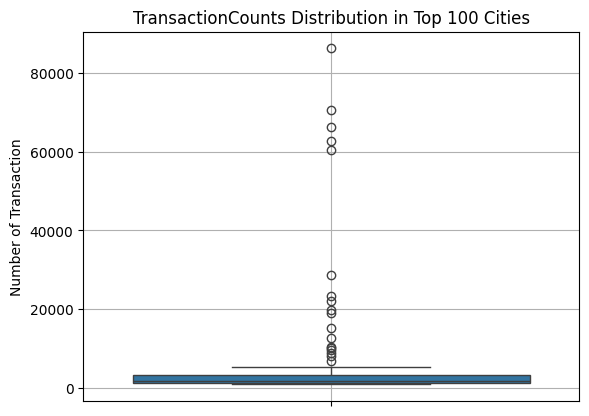

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_df = top_100.reset_index()
top_100_df.columns = ['CustLocation', 'TransactionCounts']

sns.boxplot(y=top_100_df['TransactionCounts'])
plt.title('TransactionCounts Distribution in Top 100 Cities')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

In [215]:
total_transactions = top_100_df['TransactionCounts'].sum()
print(total_transactions)

687151


In [216]:
df_Fact1_clean2 = df_Fact1_clean1.copy()

In [217]:
# Unify the same city name
df_Fact1_clean2['CustLocation'] = df_Fact1_clean2['CustLocation'].replace(
    {'BENGALURU': 'BANGALORE', 'BENGALOORU': 'BANGALORE', 'BENGALORE': 'BANGALORE'}
)

In [218]:
top_100 = df_Fact1_clean2['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI           86288
BANGALORE        72684
NEW DELHI        66187
GURGAON          62752
DELHI            60502
                 ...  
DHANBAD            885
KARIMNAGAR         880
KANCHEEPURAM       873
THRISSUR           847
SRIPERUMBUDUR      843
Name: count, Length: 100, dtype: int64


In [219]:
#Display the 5 top Locations
import sqlite3
conn = sqlite3.connect('transactions.db')
df_Fact1_clean2.to_sql('transactions', conn, if_exists='replace', index=False)

879861

In [220]:
query = """
SELECT CustLocation, COUNT(*) AS transaction_count
FROM transactions
GROUP BY CustLocation
ORDER BY transaction_count DESC
LIMIT 5
"""

top_locations = pd.read_sql_query(query, conn)
print(top_locations)

  CustLocation  transaction_count
0       MUMBAI              86288
1    BANGALORE              72684
2    NEW DELHI              66187
3      GURGAON              62752
4        DELHI              60502


In [221]:
#RFM analysis
#set analysis date
analysis_date = df_Fact1_clean2['TransactionDate'].max() + pd.Timedelta(days=1)
print("Analysis date:", analysis_date)

Analysis date: 2016-10-22 00:00:00


In [174]:
#Calculate Recency，Frequency，Monetary
rfm = df_Fact1_clean2.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (analysis_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount (INR)': 'sum'
}).reset_index()

In [175]:
#Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [176]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.00
1,C1010012,69,1,1499.00
2,C1010014,76,2,1455.00
3,C1010018,37,1,30.00
4,C1010028,54,1,557.00
5,C1010031,79,2,1864.00
6,C1010035,56,2,750.00
7,C1010036,57,1,208.00
8,C1010037,74,1,19680.00
9,C1010038,45,1,100.00


In [177]:
rfm.describe()

,Recency,Frequency,Monetary
count,761470.00,761470.00,761470.00
mean,56.55,1.16,1469.65
std,15.23,0.41,5835.11
min,1.00,1.00,0.01
25%,45.00,1.00,175.15
50%,56.00,1.00,488.19
75%,70.00,1.00,1245.91
max,82.00,6.00,1560034.99


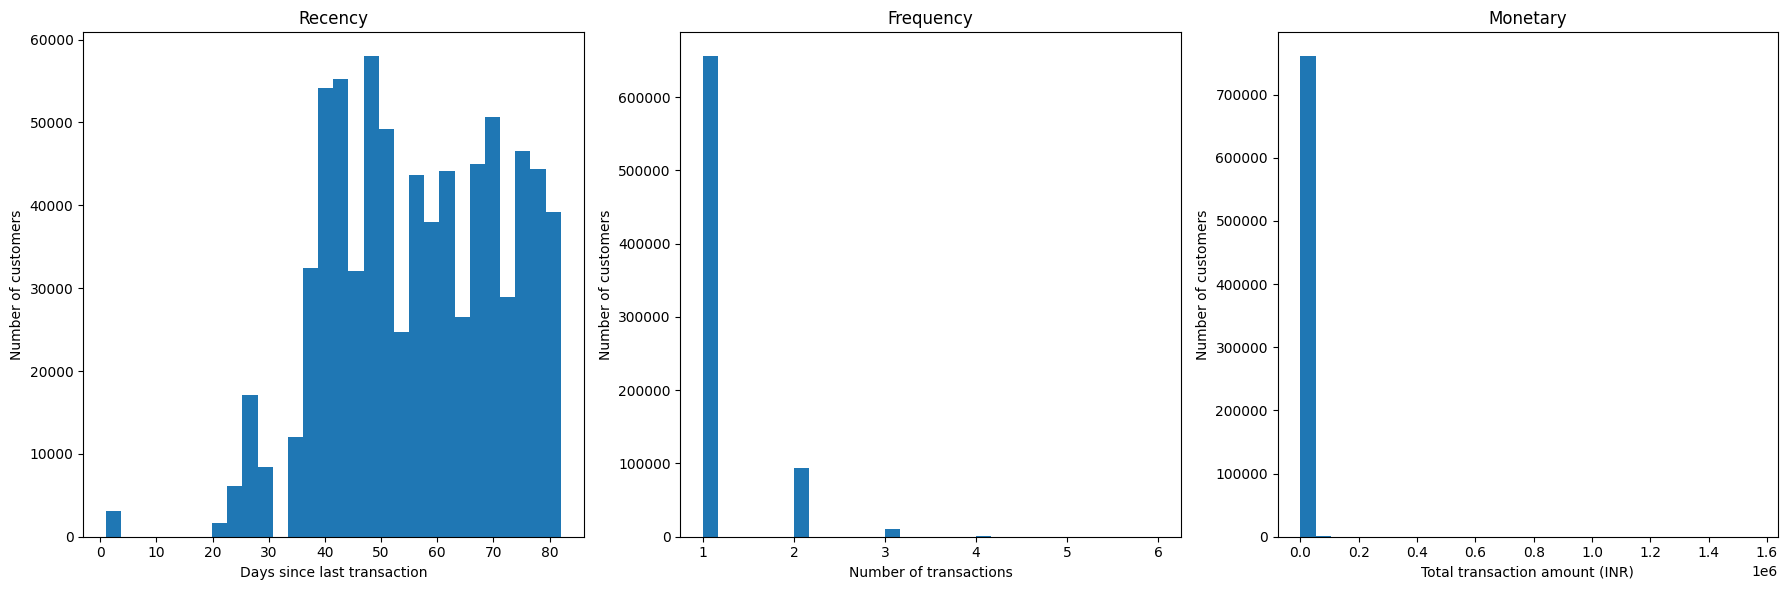

In [178]:
#Check Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Recency
axs[0].hist(rfm['Recency'], bins=30)
axs[0].set_title('Recency')
axs[0].set_xlabel('Days since last transaction')
axs[0].set_ylabel('Number of customers')

# Frequency
axs[1].hist(rfm['Frequency'], bins=30)
axs[1].set_title('Frequency')
axs[1].set_xlabel('Number of transactions')
axs[1].set_ylabel('Number of customers')

# Monetary
axs[2].hist(rfm['Monetary'], bins=30)
axs[2].set_title('Monetary')
axs[2].set_xlabel('Total transaction amount (INR)')
axs[2].set_ylabel('Number of customers')

plt.tight_layout()
plt.show()

In [179]:
from scipy import stats

rfm_boxcox = pd.DataFrame({
    'CustomerID': rfm['CustomerID'],
    'Recency': stats.boxcox(rfm['Recency'] + 1)[0],
    'Frequency': stats.boxcox(rfm['Frequency'])[0],
    'Monetary': stats.boxcox(rfm['Monetary'] + 1)[0]
})

In [180]:
rfm_boxcox.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,43.58,0.10,9.91
1,C1010012,139.60,0.00,8.31
2,C1010014,156.74,0.10,8.27
3,C1010018,66.29,0.00,3.64
4,C1010028,104.10,0.00,7.06
5,C1010031,164.19,0.10,8.59
6,C1010035,108.73,0.10,7.43
7,C1010036,111.05,0.00,5.86
8,C1010037,151.81,0.00,11.76
9,C1010038,83.72,0.00,5.00


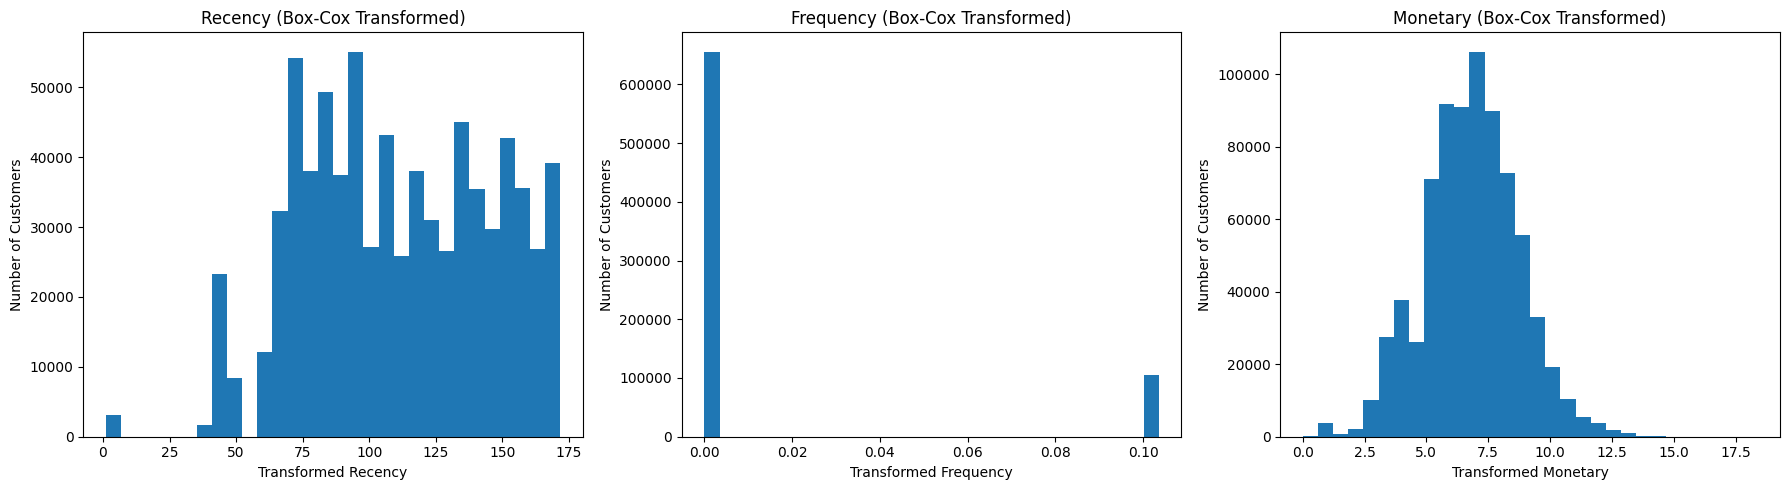

In [181]:
#Check Distribution after remove skew

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Recency
axs[0].hist(rfm_boxcox['Recency'], bins=30)
axs[0].set_title('Recency (Box-Cox Transformed)')
axs[0].set_xlabel('Transformed Recency')
axs[0].set_ylabel('Number of Customers')

# Frequency
axs[1].hist(rfm_boxcox['Frequency'], bins=30)
axs[1].set_title('Frequency (Box-Cox Transformed)')
axs[1].set_xlabel('Transformed Frequency')
axs[1].set_ylabel('Number of Customers')

# Monetary
axs[2].hist(rfm_boxcox['Monetary'], bins=30)
axs[2].set_title('Monetary (Box-Cox Transformed)')
axs[2].set_xlabel('Transformed Monetary')
axs[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()
